In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
directory = "/Users/mundogn/Documents/Estadistica-III-Proy1/CroppedYale_3/yaleB01"
X = np.zeros((65,32256))

In [3]:
for i in range(1,65):
    im = Image.open("/Users/mundogn/Documents/Estadistica-III-Proy1/CroppedYale_3/yaleB01/"+str(i)+".pgm")
    aux = np.asarray(im.getdata())
    aux = np.transpose(aux)
    X[i-1] = aux

In [4]:
X_hat = X.mean(axis=0)
len(X_hat)
X = X - X_hat

In [5]:
pca = PCA(n_components = 10)
principalComponents = pca.fit_transform(X)

/Users/mundogn/Library/Python/3.7/lib/python/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


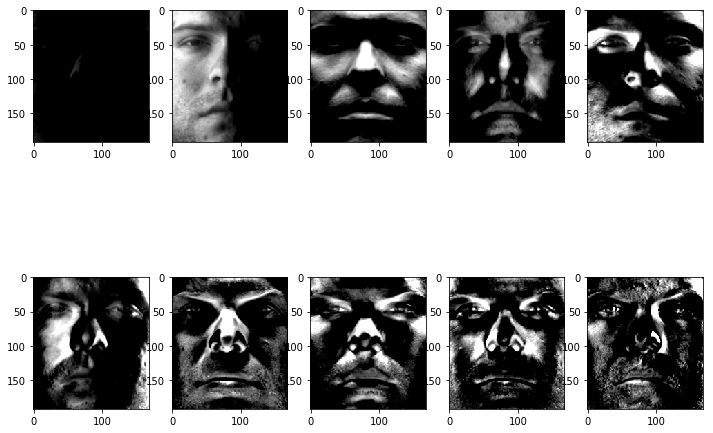

In [6]:
fig,axes = plt.subplots( 2,5, figsize=[12,9] )
for i,iax in enumerate( axes.flatten() ):
    im.putdata(25500*pca.components_[i,:])
    iax.imshow(im)
fig.show()

In [7]:
pca.explained_variance_ratio_

array([0.43970281, 0.37391139, 0.08258714, 0.0266476 , 0.0199689 ,
       0.0142067 , 0.0064434 , 0.00461483, 0.00320973, 0.00249167])

In [8]:
principalDf = pd.DataFrame(data = pca.explained_variance_ratio_
             , columns = ['Varianza explicada por componente'])
principalDf.head(10)

,Varianza explicada por componente
0,0.439703
1,0.373911
2,0.082587
3,0.026648
4,0.019969
5,0.014207
6,0.006443
7,0.004615
8,0.003210
9,0.002492


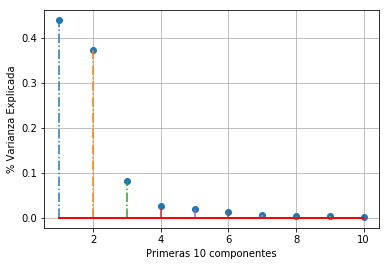

In [9]:
plt.ylabel('% Varianza Explicada')
plt.xlabel('Primeras 10 componentes')
plt.grid(True)
x = np.linspace(1, 10, 10)

markerline, stemlines, baseline = plt.stem(x, pca.explained_variance_ratio_, '-.')

# setting property of baseline with color red and linewidth 2
plt.setp(baseline, color='r', linewidth=2)

plt.show()

In [10]:
np.sum(pca.explained_variance_ratio_)

0.9737841604641098

In [11]:
X_pca = pca.transform(X)
projected = pca.inverse_transform(X_pca)
len(projected[0])


32256

In [12]:
im.putdata(projected[:,48])
im.show()

/Users/mundogn/Library/Python/3.7/lib/python/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


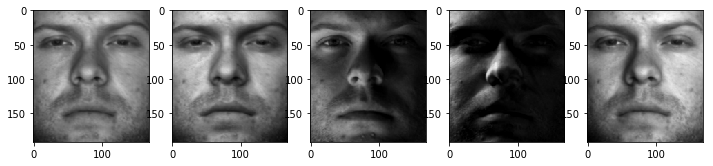

In [13]:
fig,axes = plt.subplots( 1,5, figsize=[12,9] )
for i,iax in enumerate( axes.flatten() ):
    im.putdata(projected[i*10,:]+X_hat)
    iax.imshow(im)
fig.show()

In [14]:
X_hat = X.mean(axis=1)
im.putdata(X_hat)
im.show()